# Data Extraction

In [1]:
import os
import pandas as pd

# Read CSV files
assignment1_draft = pd.read_csv(os.path.join('grades', 'Assignment 1 draft.csv'))
assignment1_final = pd.read_csv(os.path.join('grades', 'Assignment 1 final.csv'))
assignment2_draft = pd.read_csv(os.path.join('grades', 'Assignment 2 draft.csv'))
assignment_grades = pd.read_csv(os.path.join('grades', 'assignmentgrades.csv'))

In [2]:
# Get last name and first name from assignment grades (word before "," in the column "Student")

assignment_grades['Last Name'] = assignment_grades['Student'].str.split(',').str[0]

# Get last name and first name from assignments (last word of the column "Student")

assignment1_draft['Last Name'] = assignment1_draft['Student'].str.split().str[-1].map(lambda x: x.upper())
assignment1_final['Last Name'] = assignment1_final['Student'].str.split().str[-1].map(lambda x: x.upper())
assignment2_draft['Last Name'] = assignment2_draft['Student'].str.split().str[-1].map(lambda x: x.upper())

In [3]:
# Ensure "ID" is a string in assignment grades
assignment_grades['ID'] = assignment_grades['ID'].astype(str)

# Merge "ID" from assignment grades with "Last Name" from assignments

assignment1_draft_merged = pd.merge(assignment1_draft,assignment_grades[['ID', 'Last Name']],on='Last Name',how='left')
assignment1_final_merged = pd.merge(assignment1_final,assignment_grades[['ID', 'Last Name']],on='Last Name',how='left')
assignment2_draft_merged = pd.merge(assignment2_draft,assignment_grades[['ID', 'Last Name']],on='Last Name',how='left')

In [4]:
# Save merged files
assignment1_draft_merged.to_csv(os.path.join('grades', 'Assignment 1 draft merged.csv'), index=False)
assignment1_final_merged.to_csv(os.path.join('grades', 'Assignment 1 final merged.csv'), index=False)
assignment2_draft_merged.to_csv(os.path.join('grades', 'Assignment 2 draft merged.csv'), index=False)

In [5]:
from utilities import grade_by_code

import ipdb

# Load assignments
assignment_dataframes = [
    assignment1_draft_merged,
    assignment1_final_merged,
    assignment2_draft_merged,
]

# Locate grade folders
folders = [
    os.path.join('grades', 'ai', 'Assignment 1', 'draft'),
    os.path.join('grades', 'ai', 'Assignment 1', 'final'),
    os.path.join('grades', 'ai', 'Assignment 2', 'draft'),
]

# Locate dataframe savepaths
dataframe_folders = [
    os.path.join('grades', 'Assignment 1 draft ai-graded.csv'),
    os.path.join('grades', 'Assignment 1 final ai-graded.csv'),
    os.path.join('grades', 'Assignment 2 draft ai-graded.csv'),
]

for assignment_dataframe, folder, savepath in zip(assignment_dataframes, folders, dataframe_folders):
    # Extract codes from assignment dataframe
    codes = assignment_dataframe['ID'].tolist()

    # Defines new columns
    columns = [
        'ai:intro',
        'ai:extraction_validity',
        'ai:extraction_accuracy',
        'ai:justifications_structure',
        'ai:justifications_content',
        'ai:evaluation_structure',
        'ai:evaluation_content',
        'ai:clarity',
        'ai:grammar',
        'ai:overall']
    
    # Add new columns to assignment dataframe
    for column in columns:
        assignment_dataframe[column] = None

    # Extract grades by code
    for code in codes:
        # Grade by code
        try:
            grade = grade_by_code(folder, code)
        except:
            # Fills grade with 'None' in case it fails
            grade = [None, None, None, None, None, None, None, None, None, None]
        # Add grades to assignment dataframe
        assignment_dataframe.loc[assignment_dataframe['ID'] == code, columns] = grade
    
    # Save assignment dataframe
    assignment_dataframe.to_csv(savepath, index=False)

# Graphs

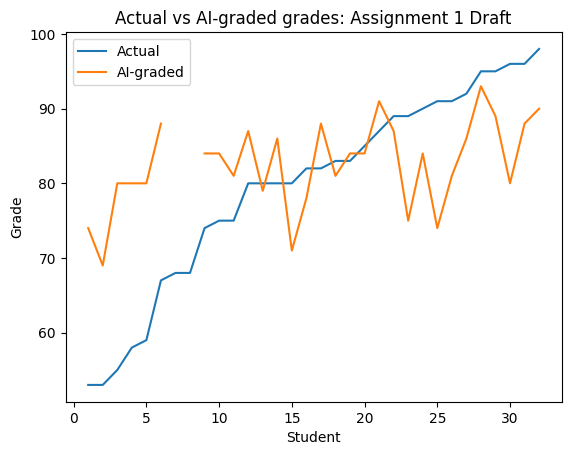

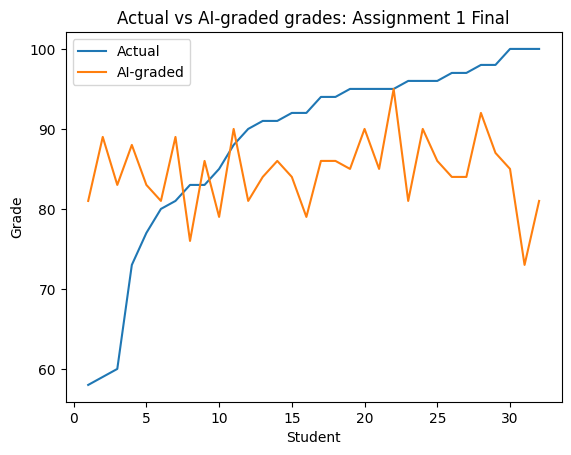

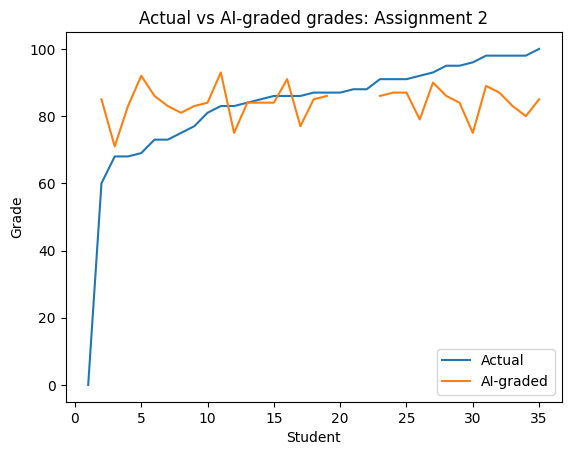

In [3]:
# Import libraries
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np

# Select dataframes

assignment1_draft_aigraded = pd.read_csv(os.path.join('grades', 'Assignment 1 draft ai-graded.csv'))
assignment1_final_aigraded = pd.read_csv(os.path.join('grades', 'Assignment 1 final ai-graded.csv'))
assignment2_draft_aigraded = pd.read_csv(os.path.join('grades', 'Assignment 2 draft ai-graded.csv'))

# Sort dataframes by grade
assignment1_draft_aigraded = assignment1_draft_aigraded.sort_values(by=['Total'], ascending=True)
assignment1_final_aigraded = assignment1_final_aigraded.sort_values(by=['Total'], ascending=True)
assignment2_draft_aigraded = assignment2_draft_aigraded.sort_values(by=['Total'], ascending=True)

# Define a column with an increasing index, starting at 1
assignment1_draft_aigraded['Index'] = np.arange(len(assignment1_draft_aigraded)) + 1
assignment1_final_aigraded['Index'] = np.arange(len(assignment1_final_aigraded)) + 1
assignment2_draft_aigraded['Index'] = np.arange(len(assignment2_draft_aigraded)) + 1

# Make graphs comparing actual vs ai-graded grades
##################################################

# Define path to save graphs
comparison_graphs = [
    os.path.join('grades', 'Assignment 1 draft comparison.png'),
    os.path.join('grades', 'Assignment 1 final comparison.png'),
    os.path.join('grades', 'Assignment 2 draft comparison.png'),
]

# Define dataframes to compare
dataframes = [
    assignment1_draft_aigraded,
    assignment1_final_aigraded,
    assignment2_draft_aigraded,
]

assignment_names = [
    'Assignment 1 Draft',
    'Assignment 1 Final',
    'Assignment 2',
]

# Make graphs
for dataframe, savepath, assignment_name in zip(dataframes, comparison_graphs, assignment_names):
    # Define x and y
    x = dataframe['Index']
    y1 = dataframe['Total']
    y2 = dataframe['ai:overall']

    # Define figure and axes
    fig, ax = plt.subplots()

    # Plot data
    ax.plot(x, y1, label='Actual')
    ax.plot(x, y2, label='AI-graded')

    # Set labels
    ax.set_xlabel('Student')
    ax.set_ylabel('Grade')

    # Set title
    ax.set_title('Actual vs AI-graded grades: ' + assignment_name)

    # Set legend
    ax.legend()

    # Save figure
    plt.savefig(savepath)

